<a href="https://colab.research.google.com/github/Ahmed-Beltagy/DeepLearning-MiniProject/blob/main/DeepLearning_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# Check Image Extension
import imghdr

import os

In [2]:
gpus = tf.config.experimental.list_physical_devices("GPU")
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


(880, 1400, 3)


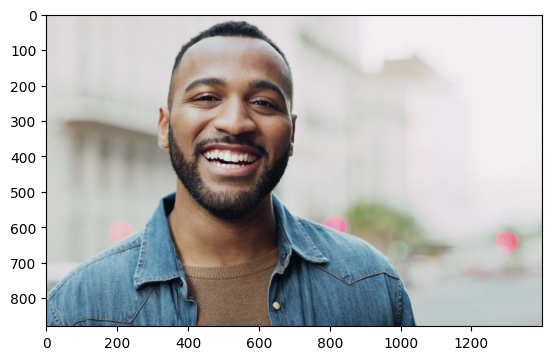

In [3]:
img = cv2.imread(os.path.join("data", "happy", "/content/data/happy/05-12-21-happy-people.jpg"))
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
rm -rf `find -type d -name .ipynb_checkpoints`

# Removing Corrupted Images

In [5]:
data = "/content/data"
print(os.listdir(data))
img_extensions = ["jpeg", "jpg", "bmp", "png"]

['sad', 'happy']


In [6]:
for image_class in os.listdir(data): 
    for image in os.listdir(os.path.join(data, image_class)):
        image_path = os.path.join(data, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in img_extensions: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# Loading Data

In [7]:
# Data pipeline
my_data = tf.keras.utils.image_dataset_from_directory(data)

Found 148 files belonging to 2 classes.


In [8]:
# To be able to access our data
data_iterator = my_data.as_numpy_iterator()

In [9]:
# Grapping one batch ran this again to get another batch
batch = data_iterator.next()

In [10]:
# Image represented as numpy array
print(batch[0].shape)

# Labels
print(batch[1].shape)

(32, 256, 256, 3)
(32,)


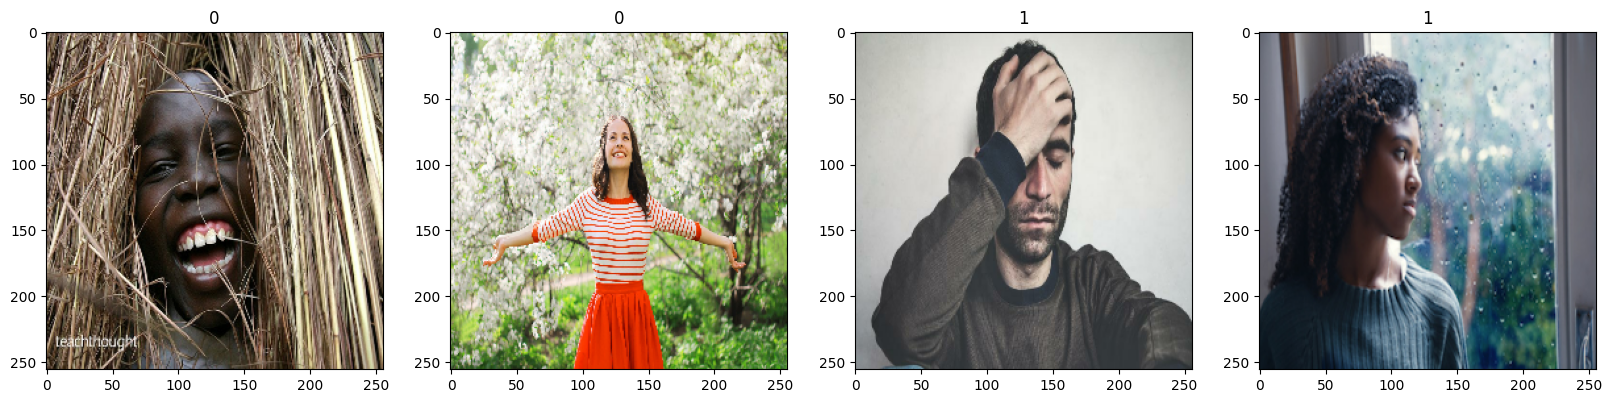

In [11]:
# Check images with their labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# So As we can see Happy -> 0, Sd -> 1

# Pre-Processing Part

In [12]:
# Scaling our data, tomoptimize our model
my_data = my_data.map(lambda x,y: (x/255, y))

In [13]:
batch = my_data.as_numpy_iterator().next()

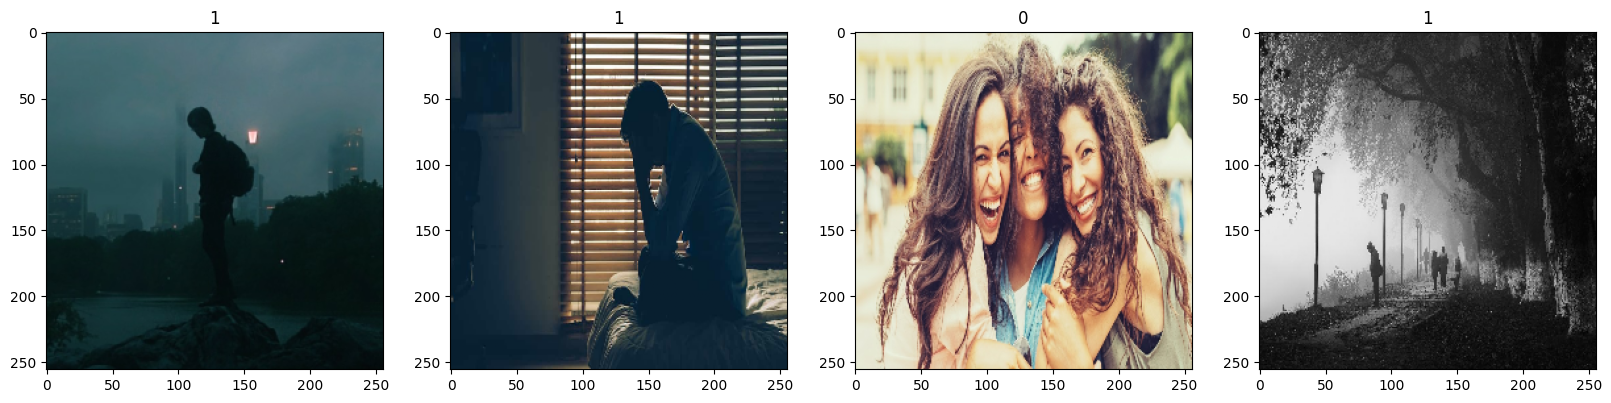

In [14]:
# Check images with their labels
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# Spliting Our Data (Trian, Val, and Test)

In [15]:
train_size = int(len(my_data)*.7) # => 3
val_size = int(len(my_data)*.2) # => 1
test_size = int(len(my_data)*.1)+1 # => 1

In [16]:
train_data = my_data.take(train_size)
val_data = my_data.skip(train_size).take(val_size)
test_data = my_data.skip(train_size+val_size).take(test_size)

# Modeling Part Using Keras Sequential

In [17]:
from keras.api._v2.keras import activations
model = Sequential()


# Architecture Parameters
# 16 filters to extract important information from our images
# filter size is 3X3
# Stride of 1
# activation is Relu
model.add(Conv2D(16, (3,3), 1, activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation="relu"))
model.add(MaxPooling2D())


# Fully connected NN
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid")) # => 0, 1


In [18]:
# optimizer, loss function
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

# Get summary for our Model

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# Training Part

In [20]:
# store log info in this directory (Model info in each step)
logdir = "/content/logs"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
my_model = model.fit(train_data, epochs=30, validation_data=val_data, callbacks=[tensorboard_callback])

Epoch 1/30
3/3 [==============================] - 11s 1s/step - loss: 1.0878 - accuracy: 0.5625 - val_loss: 0.7077 - val_accuracy: 0.4688
Epoch 2/30
3/3 [==============================] - 5s 1s/step - loss: 0.7271 - accuracy: 0.4792 - val_loss: 0.7056 - val_accuracy: 0.4062
Epoch 3/30
3/3 [==============================] - 6s 1s/step - loss: 0.6916 - accuracy: 0.5417 - val_loss: 0.6854 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 6s 2s/step - loss: 0.6730 - accuracy: 0.5312 - val_loss: 0.6312 - val_accuracy: 0.6875
Epoch 5/30
3/3 [==============================] - 5s 1s/step - loss: 0.6353 - accuracy: 0.6562 - val_loss: 0.6246 - val_accuracy: 0.6875
Epoch 6/30
3/3 [==============================] - 5s 1s/step - loss: 0.6117 - accuracy: 0.6667 - val_loss: 0.5300 - val_accuracy: 0.8125
Epoch 7/30
3/3 [==============================] - 6s 1s/step - loss: 0.5016 - accuracy: 0.7708 - val_loss: 0.4841 - val_accuracy: 0.7812
Epoch 8/30
3/3 [========================

In [22]:
# Get model process info

my_model.history

{'loss': [1.0878256559371948,
  0.7271475195884705,
  0.6916175484657288,
  0.6730238795280457,
  0.6352956891059875,
  0.6117031574249268,
  0.5016172528266907,
  0.4713117778301239,
  0.45642149448394775,
  0.42031964659690857,
  0.3581376373767853,
  0.27906328439712524,
  0.25115951895713806,
  0.16078181564807892,
  0.15168265998363495,
  0.15243889391422272,
  0.06783027201890945,
  0.10759542137384415,
  0.056903157383203506,
  0.10966775566339493,
  0.045522984117269516,
  0.04283960163593292,
  0.04637555778026581,
  0.011434893123805523,
  0.03780211880803108,
  0.0260247141122818,
  0.03178415074944496,
  0.017315411940217018,
  0.013564039953052998,
  0.008665193803608418],
 'accuracy': [0.5625,
  0.4791666567325592,
  0.5416666865348816,
  0.53125,
  0.65625,
  0.6666666865348816,
  0.7708333134651184,
  0.75,
  0.7916666865348816,
  0.8958333134651184,
  0.8854166865348816,
  0.875,
  0.9166666865348816,
  0.96875,
  0.9583333134651184,
  0.9583333134651184,
  1.0,
  0.96

# Plotting Performance

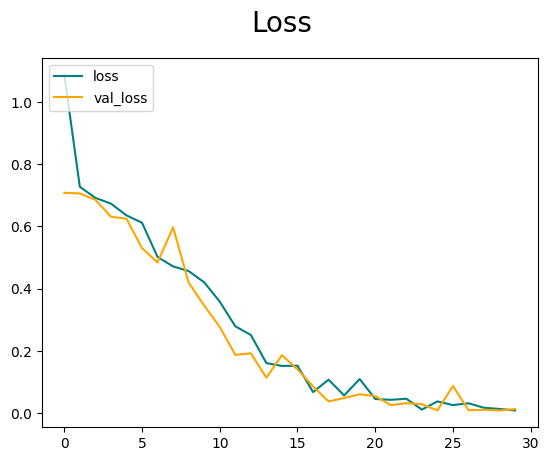

In [23]:
fig = plt.figure()
plt.plot(my_model.history['loss'], color='teal', label='loss')
plt.plot(my_model.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

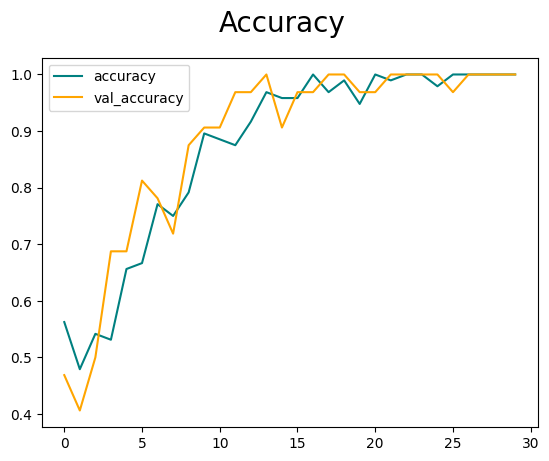

In [24]:
fig = plt.figure()
plt.plot(my_model.history['accuracy'], color='teal', label='accuracy')
plt.plot(my_model.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluation

In [26]:
# Importing different measures to use
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [27]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
for batch in test_data.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)


1/1 [==============================] - 0s 406ms/step


In [32]:
print("Precision: " + str(pre.result().numpy()))
print("Recall: " + str(re.result().numpy()))
print("Accuracy: " + str(acc.result().numpy()))

Precision: 1.0
Recall: 1.0
Accuracy: 1.0


# As we can see our model in Performing WELL!!!

# testing Part on a random images from internet

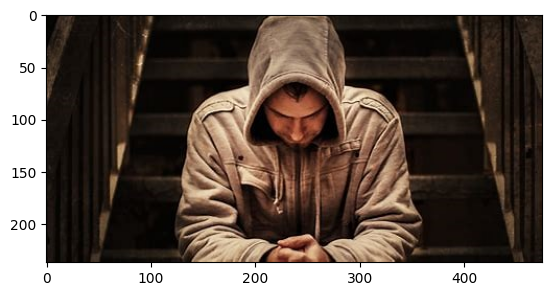

In [52]:
img = cv2.imread("/content/test2_sad.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

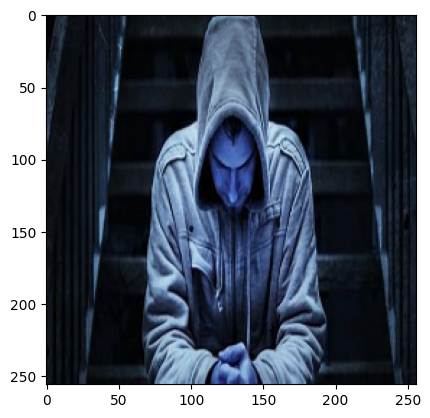

In [53]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

# Now our NN expects from us a batch of images, but we want to test only one image, what we can do is to use np.expand_dims()

* Remember Happy => 0, Sad => 1

In [54]:
ypred = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 31ms/step


In [55]:
if ypred > 0.5:
  print("Predicted class: Sad🥺")
else:
  print("Predicted class: Happy😊")  


Predicted class: Sad🥺


# Saving the Model

In [56]:
from tensorflow.keras.models import load_model

In [59]:
model.save("/content/models/happySadmodel.h5")

In [60]:
new_model = load_model("/content/models/happySadmodel.h5")

In [61]:
new_model

In [62]:
yprednew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 262ms/step


In [63]:
yprednew

array([[0.99559]], dtype=float32)